In [1]:
from CTGAN import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

!! THINGS TO FIX !!

- Leakage? As not splitting out dataset before training model
- Huge variability in metrics between runs. Cross val? Set seed?
- Add support for discrete columns (pass to fit) 
- Actually look at what is causing the warnings...

# Setup

In [3]:
i_ds1 = SDVInputDataset(filepath='../data/back_pain.csv',
                       header=0)
o_ds1 = SDVOutputDataset(len(i_ds1.dataset))
rp_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'])

In [4]:
i_ds1.dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
rp_ds1.models_to_run

['ctgan', 'copulagan', 'tvae']

# Generate Data

In [6]:
test_dict = sdv_dataset_synthesizer(input_dataset=i_ds1,
                            output_dataset=o_ds1,
                            run_params=rp_ds1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 20.32it/s]

Running for ctgan
Running for copulagan
Running for tvae


In [7]:
test_dict['real'] = i_ds1.dataset

In [8]:
for item in test_dict.keys():
    print(item)

ctgan
copulagan
tvae
real


# Explore Datasets

In [9]:
test_dict['ctgan']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,49.719264,20.470559,1.044372,65.578543,116.643250,-4.081479,0.169318,26.996248,10.017336,15.237755,-8.488366,33.143229,Abnormal,NaN
1,41.005262,21.984670,47.474023,41.172341,114.808056,17.265437,0.672445,28.028631,7.277436,12.817024,-1.076861,33.785267,Normal,NaN
2,37.379963,17.560923,21.894953,36.192258,91.073248,-11.127398,0.525557,4.758739,12.303206,12.121535,-44.590075,18.626942,Normal,NaN
3,36.214902,25.396457,12.050164,72.653559,104.251844,0.510105,0.024620,16.786204,16.977962,15.595859,-30.031451,48.746070,Normal,NaN
4,47.306441,-6.913461,17.520959,5.453618,102.384799,13.699626,0.374866,20.688640,15.498244,15.878969,-9.496213,1.786251,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,66.228648,21.606610,7.307281,36.235419,138.606863,81.423992,0.445726,33.737344,16.097287,11.622790,-1.076864,44.296617,Abnormal,Attribute6 = degree_spondylolisthesis (numeric)
306,27.370570,17.112147,41.707819,61.513318,142.135998,55.717741,0.288687,11.288037,7.718068,12.803673,-2.818867,17.977132,Normal,NaN
307,28.062007,24.260779,24.256987,9.497466,97.401002,29.649240,0.989012,18.472390,15.952017,12.828848,-13.396192,41.438458,Abnormal,Attribute12= scoliosis_slope(numeric)
308,24.678772,27.629617,11.515759,15.173599,114.198948,8.340755,0.333363,20.803098,13.722195,12.818068,4.375781,35.218640,Abnormal,Attribute11=sacrum_angle(numeric)


In [10]:
test_dict['copulagan']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,54.812757,22.875169,81.403039,31.778802,147.078764,-4.208868,0.005403,28.733492,17.990816,7.334171,-32.673441,44.207104,Abnormal,Attribute4 = sacral_slope (numeric)
1,87.043509,13.658787,31.137698,65.757121,116.027757,3.963570,0.007906,11.735815,19.281005,12.060315,-33.774818,11.363565,Normal,Prediction is done by using binary classificat...
2,67.571419,13.234629,84.183573,33.010926,121.773766,-2.315061,0.006590,7.033741,17.584120,7.057594,2.242262,39.609416,Abnormal,NaN
3,79.875361,12.735507,88.695587,37.258676,128.276527,-10.548824,0.451673,21.207391,15.177486,12.545792,-25.973620,44.222783,Abnormal,NaN
4,35.029410,25.419276,57.559895,72.020693,140.748032,6.989755,0.007819,29.489469,7.843416,7.681145,-11.011534,42.473943,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,43.442769,14.745071,61.082680,29.305302,131.592595,-0.462168,0.805342,7.062104,14.641500,7.064493,-4.005333,13.129120,Normal,Prediction is done by using binary classificat...
306,28.472311,23.486175,44.178376,69.584420,134.695284,-0.693535,0.209298,12.048416,10.959771,9.470501,1.588506,41.655364,Normal,NaN
307,41.768573,24.596666,48.802550,39.094315,112.904331,-2.222215,0.166314,36.414059,18.437067,8.902329,-32.327042,32.301620,Abnormal,NaN
308,31.202058,31.008302,46.529389,42.123473,127.054741,42.865284,0.097022,29.785753,13.010661,15.922509,-2.214951,37.046744,Abnormal,Attribute4 = sacral_slope (numeric)


In [11]:
test_dict['tvae']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,51.082589,14.995423,92.072404,32.062770,119.965545,0.486024,0.404875,14.339118,9.994558,14.121299,-10.286551,21.397260,Abnormal,Attribute11=sacrum_angle(numeric)
1,71.826185,13.532963,46.757710,50.878248,112.608017,38.546835,0.440403,18.057947,7.996906,14.924069,-5.463285,22.608373,Normal,Attribute11=sacrum_angle(numeric)
2,81.900212,14.455402,65.390197,47.768874,115.550429,21.176180,0.407108,21.055429,8.161661,15.439378,-9.415046,22.010369,Normal,Attribute5 = pelvic_radius (numeric)
3,51.360182,16.100624,58.804442,34.288284,136.283350,37.086429,0.779318,24.193260,11.628952,11.890026,-3.049532,24.046366,Normal,Attribute11=sacrum_angle(numeric)
4,41.814742,13.529688,46.078746,40.197985,113.625087,47.066148,0.427705,19.380165,11.984860,11.586261,-15.828110,12.434809,Normal,Attribute11=sacrum_angle(numeric)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,71.475477,13.126059,58.326600,35.861377,118.428654,29.934645,0.363988,21.494681,10.787907,11.097094,-7.564089,15.537058,Normal,Prediction is done by using binary classificat...
306,77.603294,17.613726,40.177325,37.722994,117.969018,33.476026,0.333128,15.745247,8.977372,14.853268,-16.685640,20.777668,Normal,Attribute5 = pelvic_radius (numeric)
307,126.466634,17.600276,81.390632,34.383760,117.645146,51.026363,0.338641,28.356538,8.646110,14.955605,-20.170884,21.820993,Abnormal,Prediction is done by using binary classificat...
308,51.843409,9.841612,88.185634,35.401713,114.240582,104.454841,0.376881,17.651641,13.699570,15.395241,3.434436,13.246598,Normal,Attribute1 = pelvic_incidence (numeric)


## Dataset characteristics

In [12]:
test_dict['ctgan'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,47.921441,13.765094,28.673768,35.896794,118.385112,21.865073,0.523173,20.251053,12.077223,11.973235,-8.008274,27.486750
std,16.975511,13.715277,17.711055,15.849997,21.662543,33.264745,0.341458,9.815332,4.054220,2.892114,13.972771,11.678632
min,16.720690,-12.555685,-3.684363,5.453618,61.958082,-19.066497,-0.155942,-0.351132,3.463994,4.738751,-44.590075,0.880851
25%,35.143398,3.310221,15.428183,23.747914,104.249731,0.427078,0.250540,12.695154,8.615799,10.059708,-18.225050,19.562346
50%,45.311350,13.191750,25.979028,34.354430,118.521224,9.570482,0.486303,20.635579,12.228394,12.102131,-7.112048,27.069994
75%,58.919427,21.697499,39.233018,45.946155,134.067631,35.122417,0.793172,27.358725,15.131710,14.125157,3.292835,35.441329
max,98.612067,58.054779,87.948458,80.958045,170.159731,181.916246,1.275995,43.369489,22.169340,18.583422,19.048867,54.736847


In [13]:
test_dict['copulagan'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,50.990064,24.047469,59.130361,48.006902,120.949225,10.200196,0.203497,17.651237,14.817007,9.662323,-11.714748,33.589184
std,16.298275,14.495172,25.498693,15.747961,20.221524,24.384088,0.237946,9.762355,3.832228,2.818955,14.764630,11.057704
min,26.873199,-5.756320,13.746207,12.358102,64.550215,-13.979147,0.003414,7.032575,7.040923,7.031704,-35.272747,7.954427
25%,37.558214,13.516800,40.240460,36.714092,110.630544,-1.520760,0.016123,8.708692,11.948966,7.249766,-26.210483,25.515182
50%,48.192602,23.135041,56.273557,48.145674,120.267193,4.909913,0.117791,14.148077,15.785555,8.613950,-8.693562,37.809175
75%,60.740859,33.623138,74.414886,59.688290,129.656919,11.047783,0.314885,26.574990,18.162014,11.256901,2.888055,42.955939
max,97.230373,65.449790,141.217656,86.447503,178.021696,205.276593,0.970046,36.610416,19.314294,16.774702,6.966390,44.334811


In [14]:
test_dict['tvae'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,62.509777,14.830819,63.431430,45.104950,117.868035,34.807385,0.424753,19.845042,11.939016,13.357314,-9.881830,24.500805
std,18.578216,3.201122,14.892544,9.238170,7.385488,16.238292,0.192282,3.636815,2.274518,2.339708,7.150120,7.884265
min,36.739027,6.390087,34.554732,24.736088,92.369286,-2.606437,0.017136,11.000804,6.967514,7.264761,-27.670537,9.081692
25%,49.516266,13.020524,48.827434,36.827698,113.638823,28.891265,0.331134,17.512528,10.116369,11.679480,-15.127547,18.500006
50%,54.170354,14.693411,66.705095,47.175135,118.663218,35.084995,0.404706,19.268985,11.835336,14.488376,-9.725900,22.556925
75%,74.788638,16.601937,75.720105,52.503454,122.153444,41.127343,0.487281,21.998796,13.167425,15.053963,-5.331860,32.580347
max,131.320585,32.151644,95.895103,65.150421,138.527465,104.454841,0.962242,30.380700,18.227639,16.262830,6.120798,41.972062


# Assessment Functions

The output of the metrics will be the 1 minus the average ROC AUC score across all the cross validation splits.

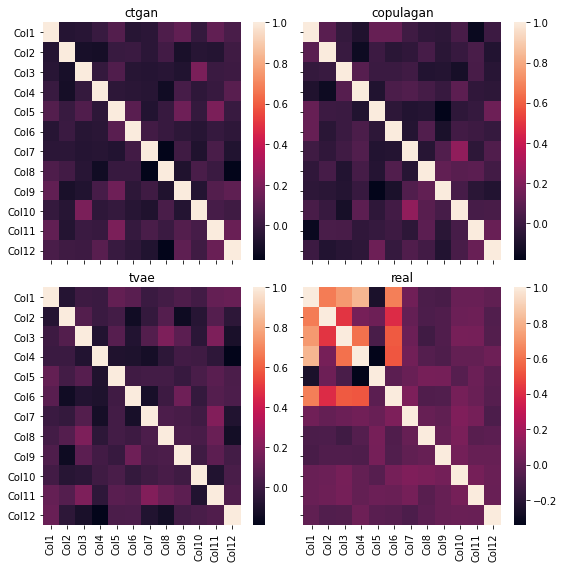

In [15]:
corr_plot(test_dict)

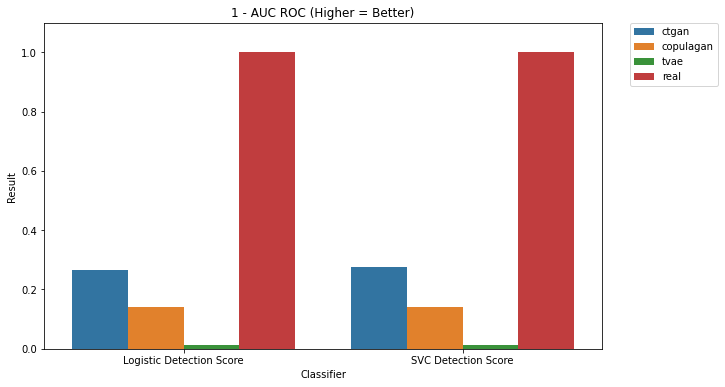

In [16]:
plot_classifier_metrics(simple_metrics(test_dict, input_dataset=i_ds1))

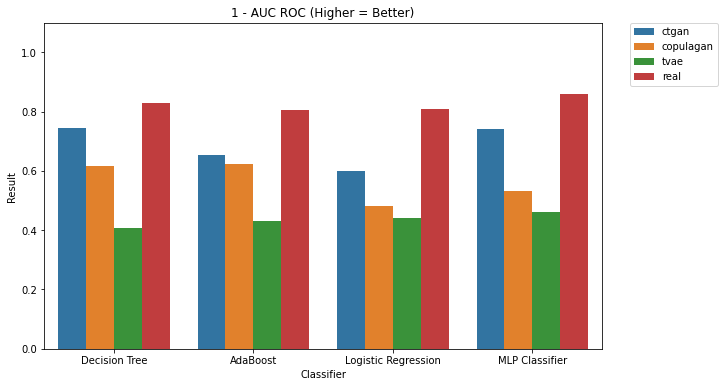

In [17]:
plot_classifier_metrics(classifier_comparison(test_dict, target_col='Class_att'))

# View impact of other params

In [18]:
def model_run(input_dataset, output_dataset, run_params, target_col):

    df_dict = sdv_dataset_synthesizer(input_dataset=input_dataset,
                                      output_dataset=output_dataset,
                                      run_params=run_params)

    df_dict['real'] = input_dataset.dataset
    
    corr_plot(df_dict)
    plot_classifier_metrics(simple_metrics(df_dict, 
                                           input_dataset=input_dataset))
    
    plot_classifier_metrics(classifier_comparison(df_dict, 
                                                  target_col=target_col))
    
    return df_dict

## More epochs, smaller batch size

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.80it/s]


Running for ctgan
Running for copulagan
Running for tvae


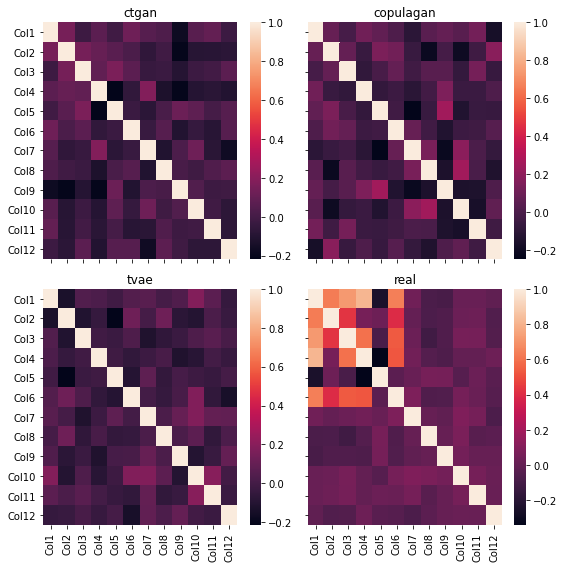

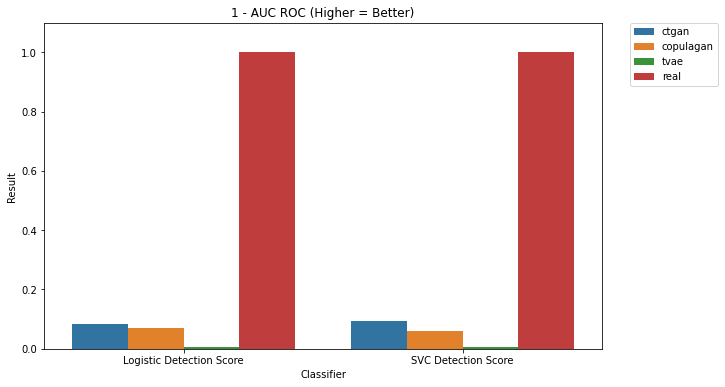

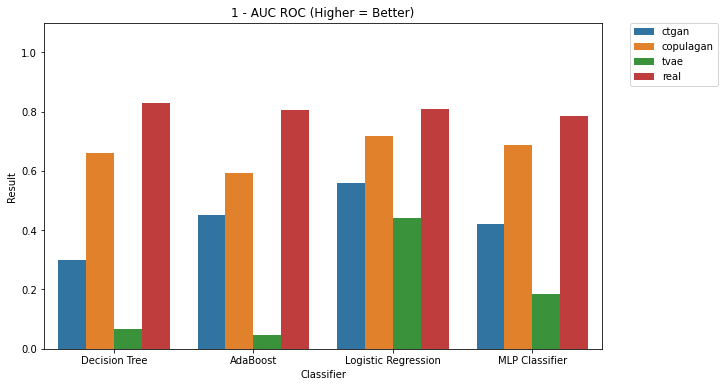

In [19]:
rp2_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500, batch_size=100)

v2_df_dict = model_run(input_dataset=i_ds1, output_dataset=o_ds1, 
          run_params=rp2_ds1, 
          target_col='Class_att')

## More layers

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.66it/s]


Running for ctgan
Running for copulagan
Running for tvae


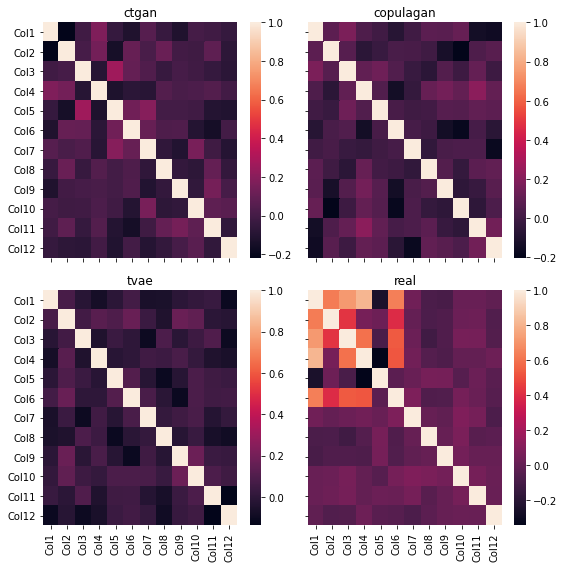

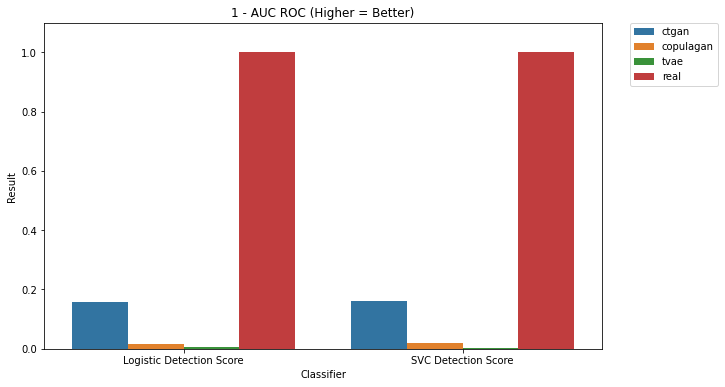

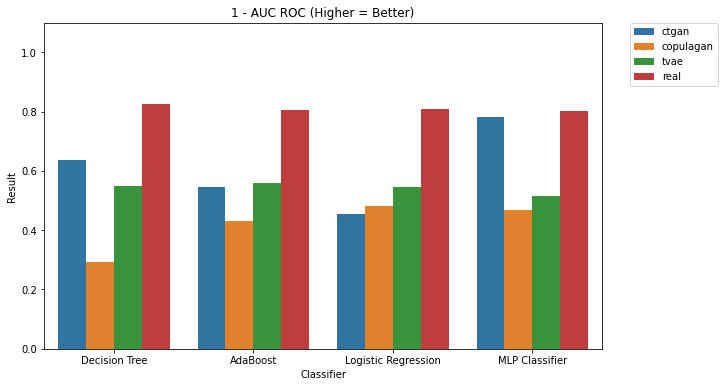

In [20]:
rp3_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256,256,256),
                             discriminator_dim=(256,256,256))

v3_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp3_ds1, 
          target_col='Class_att')

## Even more layers

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.12it/s]


Running for ctgan
Running for copulagan
Running for tvae


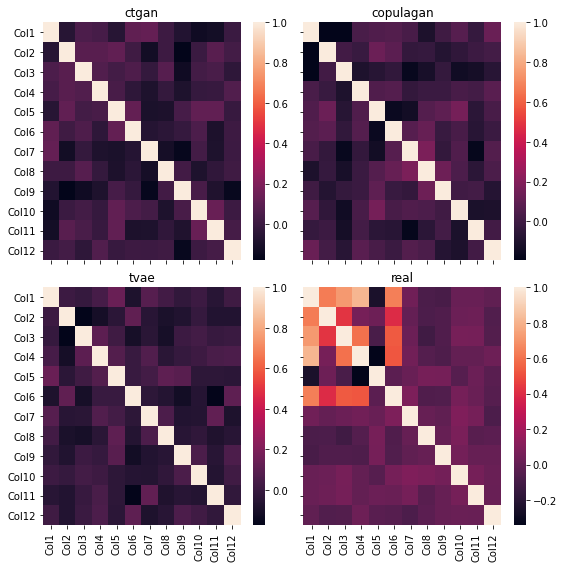

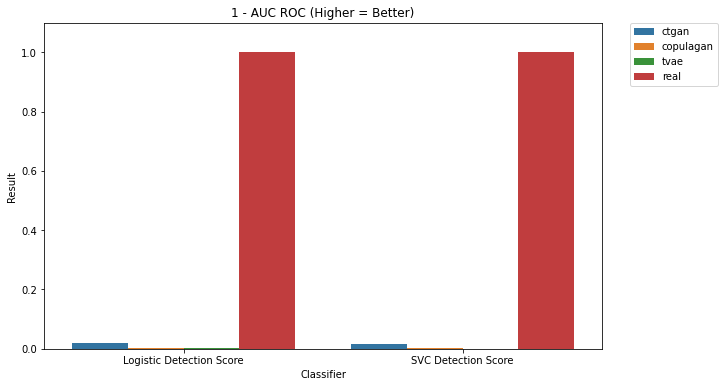

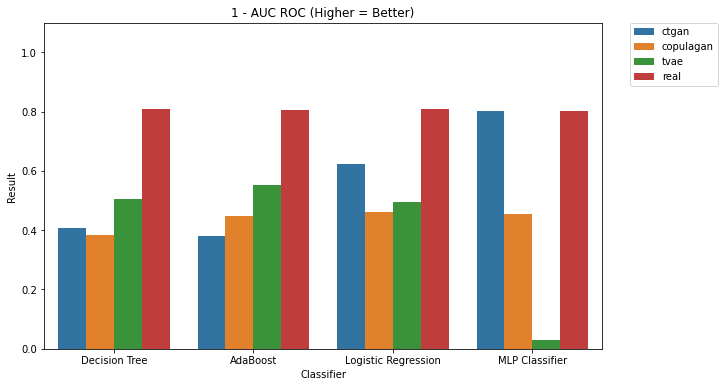

In [21]:
rp4_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256,256,256, 256),
                             discriminator_dim=(256,256,256, 256))

v4_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp4_ds1, 
          target_col='Class_att')

## Even more layers (again)

 67%|███████████████████████████████████████████████████████████████████████████████▎                                       | 2/3 [00:00<00:00, 12.77it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.90it/s]


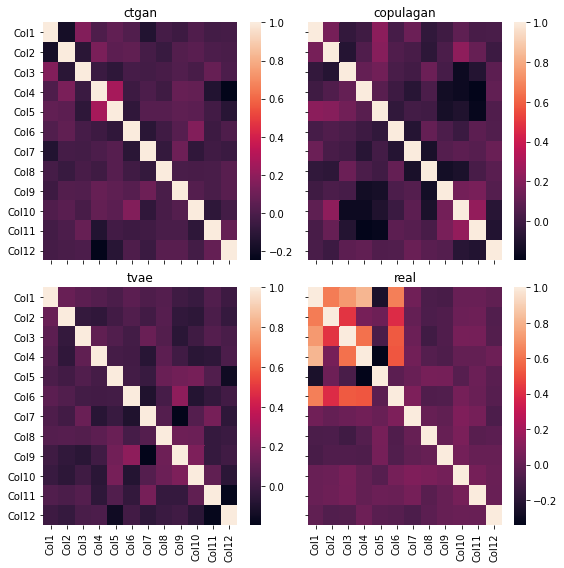

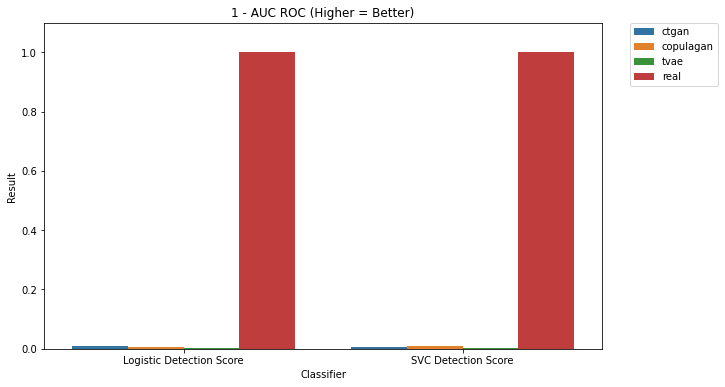

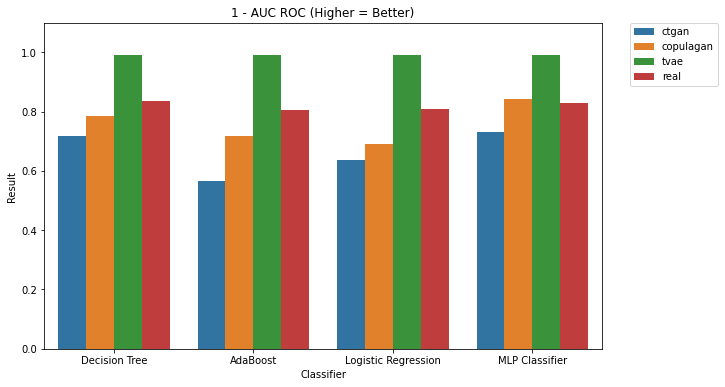

In [22]:
rp5_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256,256,256, 256, 256),
                             discriminator_dim=(256,256,256, 256, 256))

v5_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp5_ds1, 
          target_col='Class_att')

## More layers but longer training too

 67%|███████████████████████████████████████████████████████████████████████████████▎                                       | 2/3 [00:00<00:00, 12.30it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.44it/s]


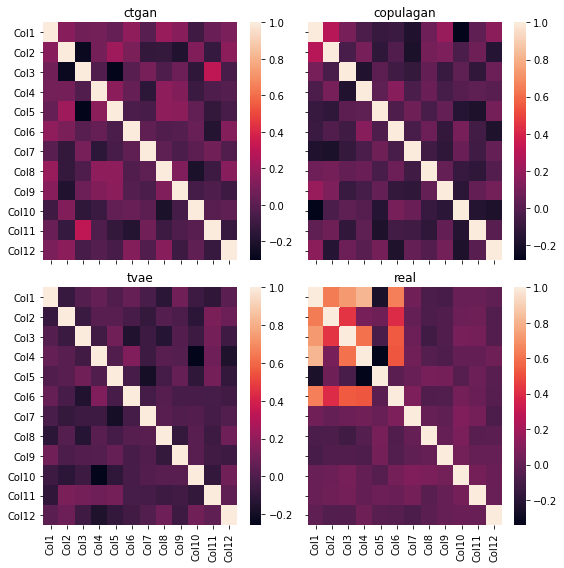

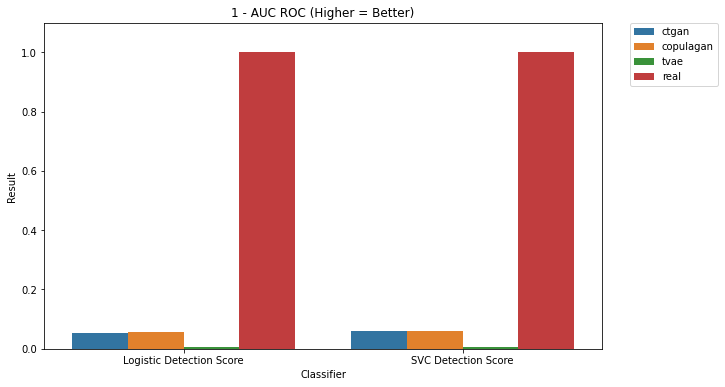

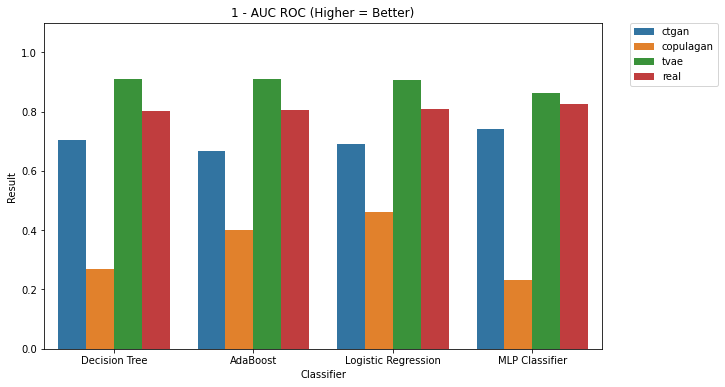

In [23]:
rp6_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500,
                             generator_dim=(256,256,256, 256, 256),
                             discriminator_dim=(256,256,256, 256, 256))

v6_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp6_ds1, 
          target_col='Class_att')

## Longer training, smaller batch size

 67%|███████████████████████████████████████████████████████████████████████████████▎                                       | 2/3 [00:00<00:00, 10.39it/s]

Running for ctgan
Running for copulagan


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.06it/s]


Running for tvae


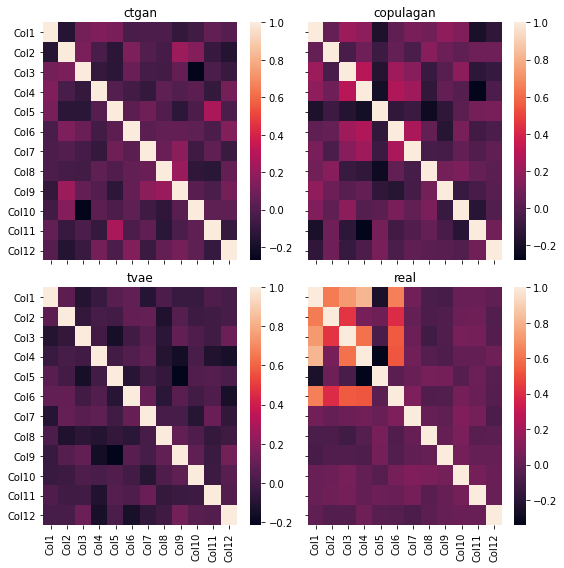

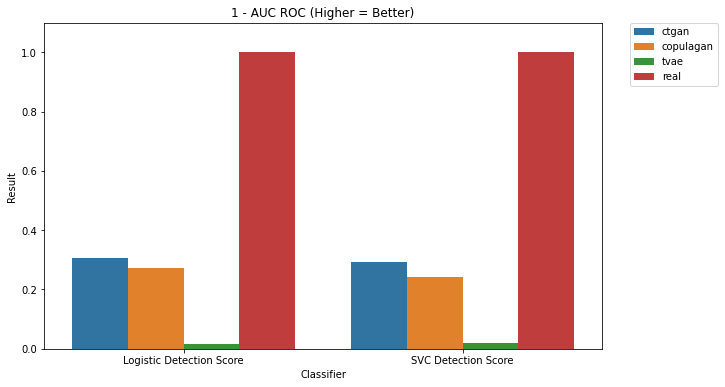

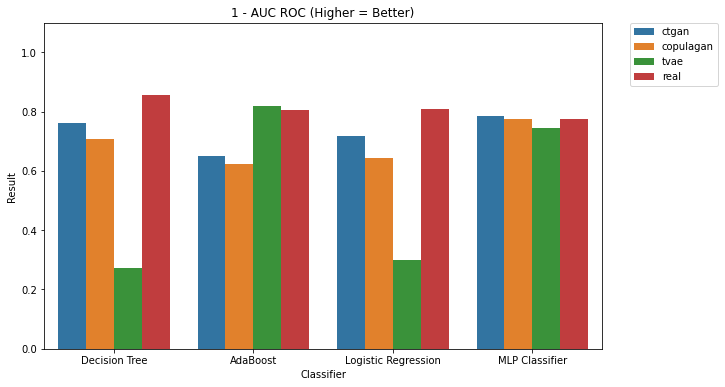

In [24]:
rp7_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500, batch_size=100,
                             generator_dim=(256,256,256, 256, 256),
                             discriminator_dim=(256,256,256, 256, 256))

v7_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp7_ds1, 
          target_col='Class_att')

 67%|███████████████████████████████████████████████████████████████████████████████▎                                       | 2/3 [00:00<00:00, 11.94it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 16.00it/s]


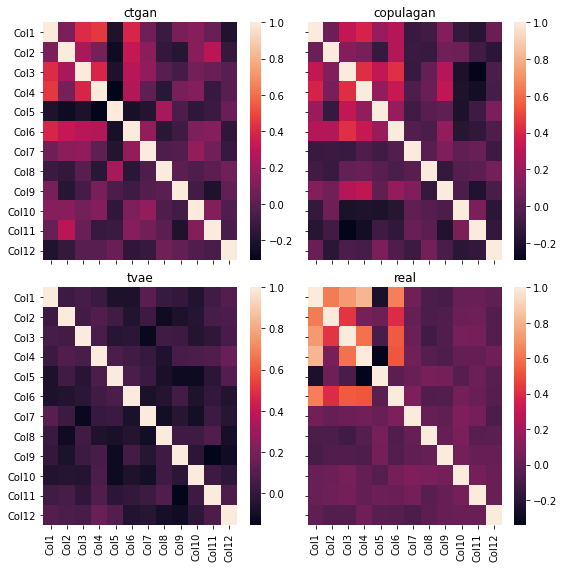

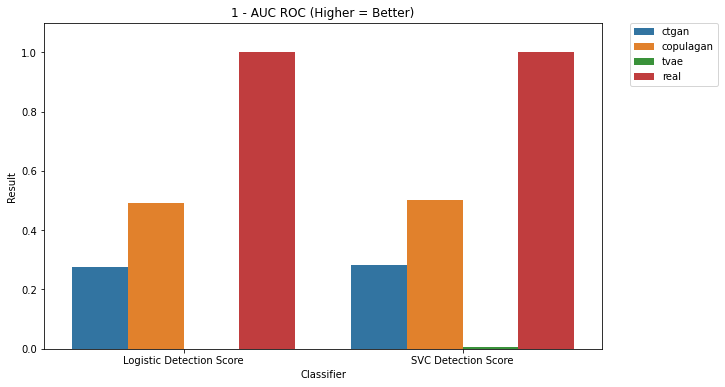

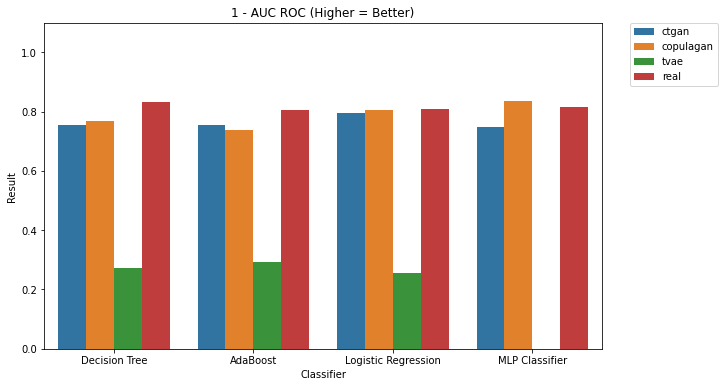

In [25]:
rp8_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=1000, batch_size=100,
                             generator_dim=(256,256,256, 256, 256),
                             discriminator_dim=(256,256,256, 256, 256))

v8_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp8_ds1, 
          target_col='Class_att')

 67%|███████████████████████████████████████████████████████████████████████████████▎                                       | 2/3 [00:00<00:00, 11.94it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.92it/s]


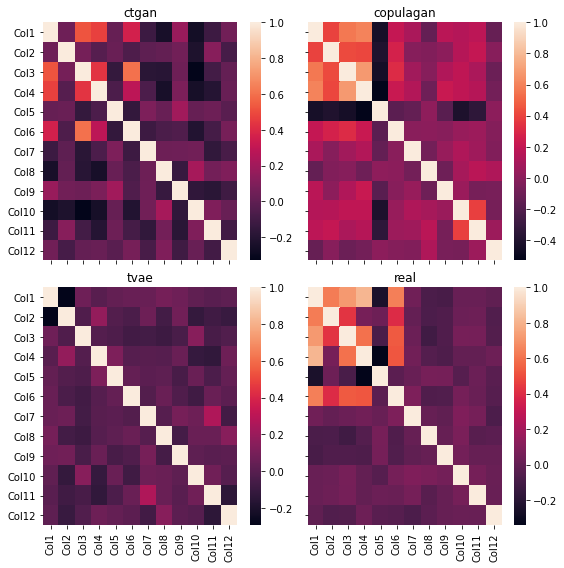

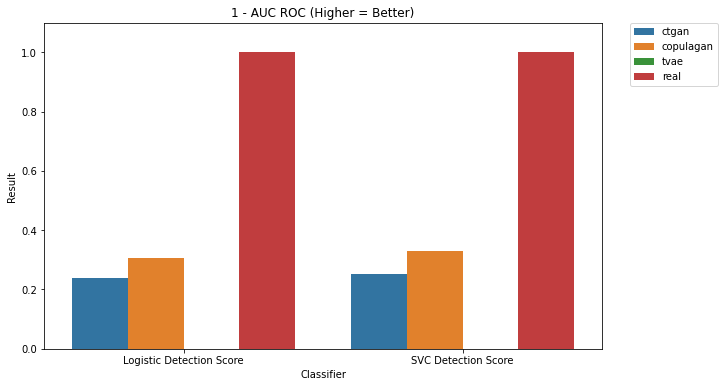

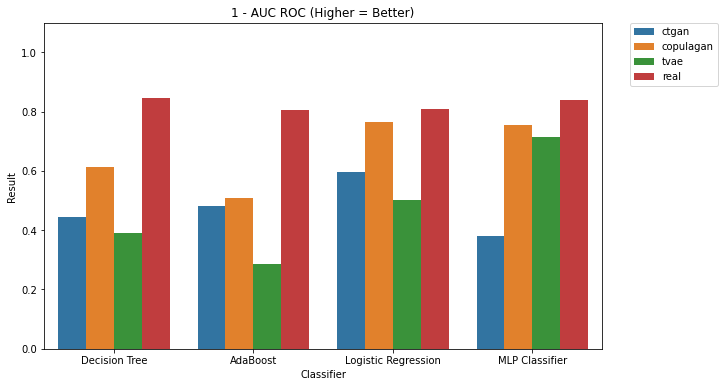

In [26]:
rp9_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=2000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v9_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp9_ds1, 
          target_col='Class_att')

 67%|███████████████████████████████████████████████████████████████████████████████▎                                       | 2/3 [00:00<00:00, 10.61it/s]

Running for ctgan
Running for copulagan


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 14.26it/s]


Running for tvae


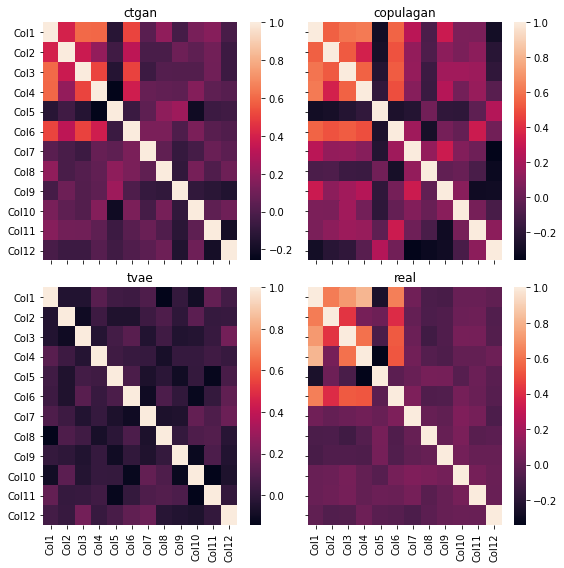

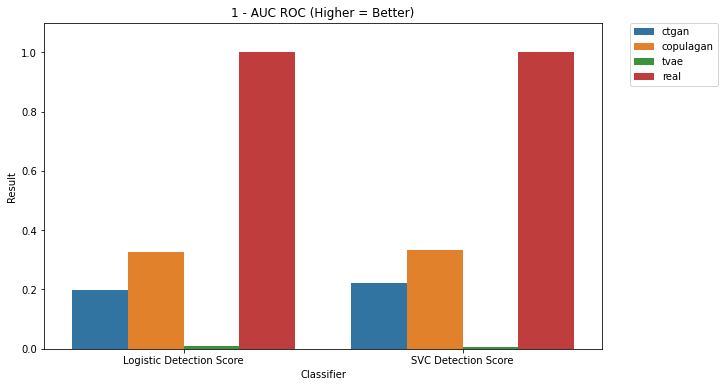

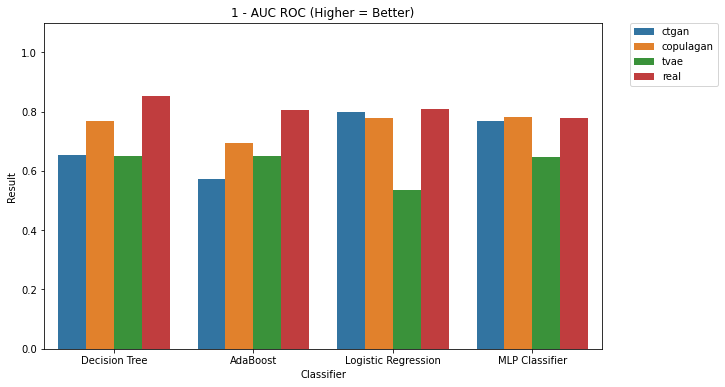

In [27]:
rp10_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=2000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256, 256))

v10_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp10_ds1, 
          target_col='Class_att')